# Cost Function 
Cost function measures the performance of a machine learning model for a data set. Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number. Depending on the problem, cost function can be formed in many different ways

## Sources:
<a href="https://www.coursera.org/learn/machine-learning/home/welcome"> [1] Supervised Machine Learning: Regression and Classification (Coursera) </a>

## 🎯 Goals:
- Learn about the Cost function 
- Implement the Cost function for linear regression with one variable in Python

##  📖 Theory 
<b>Cost function </b>: how far our predictions are from the true values in linear models
<img src="cost_function_formula.png" width="500" height="340">
where:
- w,b : model parameters or coefficients or weights
- m: number of samples
    
Different people may use different cost functions for different applications. However, the mean squared error cost function is the most common one.
No matter which cost function is used, the goal will always be to minimise the error (=cost function)

Goal of linear regression: Find the values of the parameters (w, b) that minimise the squared error (cost function). 

- Case: b == 0 
<br>In the figure below, there is the shape of the cost function when b == 0:
<img src = "cost_function_shape_case_b_zero.png" width="500" height="340">

- <b> Case: b != 0 </b>
<br> When visualising the cost function for both parameters w and b, the cost function has a soup bowl shape. There are multiple different combinations of w and b which gives the same mean squared error. What we are trying to find is the combination of w, b that minimizes the mean squared error (cost function)
<table><tr><td><img src='cost_function_shape_b_not_zero.png'></td><td><img src='cost_function_shape_b_not_zero_2.png'></td></tr></table>

## 💻 Practice (Python)
Libraries that will be used:
- NumPy (scientific computing)
- Matplotlib (plotting the data)

In [15]:
#1. Import the libraries:
import numpy as np
import matplotlib.pyplot as plt

### Problem Statement
Create a model that can predict monthly house rental in Thessaloniki (Greece) given the size of the house in square meters.
<br> We will start with a small dataset of only 10 data points:

| Size (m^2)  | Price (euros)|
| ------------ | ------------ |
| 30           | 250          |
| 50           | 400          |
| 65           | 500          |
| 25           | 240          |
| 80           | 480          |
| 55           | 410          |
| 60           | 440          |
| 120          | 520          |
| 100          | 470          |
| 150          | 700          |

In [30]:
x_train = np.array([30.0, 50.0, 65.0, 25.0, 80.0, 55.0, 60.0, 120.0, 100.0, 150.0]) # Size 
y_train = np.array([250.0, 400.0, 500.0, 240.0, 480.0, 410.0, 440.0, 520.0, 470.0, 700.0]) #Rental price

### Plot the dataset:
The first thing we should do is to plot the dataset to see the relationsheep between the two variables

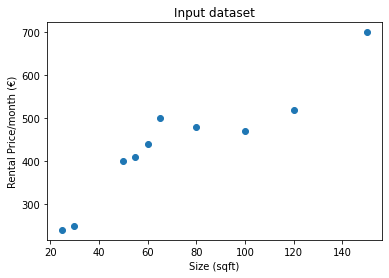

In [37]:
plt.scatter(x=x_train, y=y_train)
plt.xlabel('Size (sqft)'); plt.ylabel('Rental Price/month (€)');
plt.title('Input dataset');

What we should do next, is to find the values of the parameters w, b that minimizes the Cost function.

Let's say that we set: w=5 and b=4 and try to visualize the real data (blue data points) along with our estimation (red line):  $ \hat{y}  = 5x + 4$


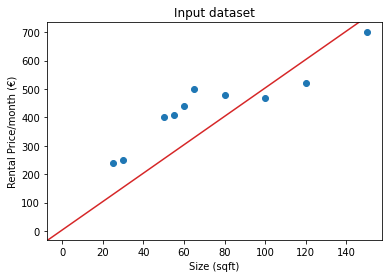

In [49]:
plt.scatter(x=x_train, y=y_train)
plt.axline(xy1=(0, 4), slope=5, color='tab:red') #where: slope == w and xy1=(0,4) == xy1 =(0,b)
plt.xlabel('Size (sqft)'); plt.ylabel('Rental Price/month (€)');
plt.title('Input dataset');

Now, we want to estimate the Cost. In other words how far our predictions are from the real values. For this purspose, we will define the cost function:

### Computing Cost
Cost (or mean squared error) is a measure of how well our model is predicting the target price of the house.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = \hat{y_{i}} = wx^{(i)} + b \tag{2} $$
  
- $f_{w,b}(x^{(i)})$ or $\hat{y_{i}}$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$. 

In [50]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Now that we have defined a Python function that calculates the Cost we can use it to evaluate the performance of our solution: $ \hat{y}  = 5x + 4$

In [55]:
cost = compute_cost(x=x_train, y=y_train, w=5, b=4)
print('Cost function:', cost)
print('MSE (Mean Squared Error):', cost*2)

Cost function: 6232.75
MSE (Mean Squared Error): 12465.5


Of course, this is not the solution that minimizes the MSE. As you can imagine, there are infinite different solutions (equations), and each one of them gives a differerent cost value. To find one the best one, in the next lesson, we will use an algorithm called <b>Gradient Descent</b>.

## ⏭️ Next: Batch Gradient Descent
